### Import Modules & Set-Up

In [76]:
# basic
import pandas as pd
import numpy as np
import re
from IPython.display import display
# import xgboost as xgb

# viz
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# import graphviz

# sklearn
from sklearn.model_selection import train_test_split
# from sklearn.metrics import mutual_info_score, roc_auc_score, roc_curve, mean_squared_error
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV
# from sklearn.tree import DecisionTreeClassifier, export_text
# from sklearn.ensemble import RandomForestClassifier
# from sklearn import tree

# custom config
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [18]:
# MPL Settings
%config InlineBackend.figure_format = 'svg'

mpl.rcParams["font.family"] = "Arial"
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams["figure.figsize"] = [10, 8]
%matplotlib inline

grey = '#808080'
darkgrey = '#505050'
# (http://www.color-hex.com/color/505050)

mpl.rcParams['axes.linewidth'] = 0.3
mpl.rcParams['axes.edgecolor'] = grey
mpl.rcParams['xtick.color'] = grey
mpl.rcParams['ytick.color'] = grey
mpl.rcParams['text.color'] = darkgrey
mpl.rcParams['axes.labelcolor'] = darkgrey

In [19]:
df = pd.read_csv('train.csv')

### Exploratory Data Analysis & Feature Engineering

In [20]:
df.shape
df.dtypes.value_counts()
df.dtypes.head(10)
df.head(10)

row_ct = df.shape[0]
row_ct


(1460, 81)

object     43
int64      35
float64     3
dtype: int64

Id               int64
MSSubClass       int64
MSZoning        object
LotFrontage    float64
LotArea          int64
Street          object
Alley           object
LotShape        object
LandContour     object
Utilities       object
dtype: object

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


1460

In [21]:
# Drop ID
df.drop('Id', axis=1, inplace=True)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [22]:
def cent_tendency(col):
    mean = col.mean()
    median = col.median()
    mode = col.mode()
    print(f"The mean is {mean}")
    print(f"The median is {median}")
    print(f"The mode is {mode}")
    print()
    return mean, median, mode

In [23]:
tgt_mean, tgt_median, tgt_mode = cent_tendency(df.SalePrice)

The mean is 180921.19589041095
The median is 163000.0
The mode is 0    140000
dtype: int64



In [24]:
tgt_mean
tgt_median
tgt_mode

180921.19589041095

163000.0

0    140000
dtype: int64

Text(189967.2556849315, 148.68, 'Mean: 180921')

Text(171150.0, 167.265, 'Median: 163000')

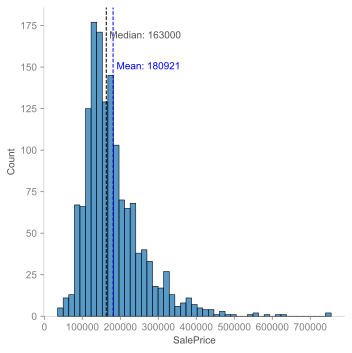

In [25]:
sns.displot(df['SalePrice'])
plt.axvline(tgt_mean, color='b', linestyle='dashed', linewidth=1)
plt.axvline(tgt_median, color='k', linestyle='dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()
plt.text(tgt_mean*1.05, max_ylim*0.8, 'Mean: {:.0f}'.format(tgt_mean), color='b')
plt.text(tgt_median*1.05, max_ylim*0.9, 'Median: {:.0f}'.format(tgt_median))

So the distribution is somewhat right-skewed, but not hugely so.

In [26]:
# Null Values
pd.DataFrame(df.isnull().mean().round(4).mul(100).sort_values(ascending=False), columns=['Percentage Missing']).head(20)

,Percentage Missing
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26
LotFrontage,17.74
GarageYrBlt,5.55
GarageCond,5.55
GarageType,5.55
GarageFinish,5.55


In [27]:
# Closeer examination of most missing variables
df[
[
'PoolQC',
'MiscFeature',
'Alley',
'Fence',
'FireplaceQu',
'LotFrontage',]
].head(20)

,PoolQC,MiscFeature,Alley,Fence,FireplaceQu,LotFrontage
0,NaN,NaN,NaN,NaN,NaN,65.0
1,NaN,NaN,NaN,NaN,TA,80.0
2,NaN,NaN,NaN,NaN,TA,68.0
3,NaN,NaN,NaN,NaN,Gd,60.0
4,NaN,NaN,NaN,NaN,TA,84.0
5,NaN,Shed,NaN,MnPrv,NaN,85.0
6,NaN,NaN,NaN,NaN,Gd,75.0
7,NaN,Shed,NaN,NaN,TA,NaN
8,NaN,NaN,NaN,NaN,TA,51.0
9,NaN,NaN,NaN,NaN,TA,50.0


In [28]:
# DEAL WITH NULL VALUES - Categorical
for c in ['PoolQC',
'MiscFeature',
'Alley',
'Fence',
'FireplaceQu',]:
    df[c] = df[c].fillna('NA')

In [30]:

msg_vars_cat = [
'GarageFinish',
'GarageYrBlt',
'GarageType',
'GarageQual',
'GarageCond',
'BsmtFinType2',
'BsmtExposure',
'BsmtQual',
'BsmtCond',
'BsmtFinType1',
'MasVnrArea',
'MasVnrType',
'Electrical',]

df[msg_vars_cat].head(10)



,GarageFinish,GarageYrBlt,GarageType,GarageQual,GarageCond,BsmtFinType2,BsmtExposure,BsmtQual,BsmtCond,BsmtFinType1,MasVnrArea,MasVnrType,Electrical
0,RFn,2003.0,Attchd,TA,TA,Unf,No,Gd,TA,GLQ,196.0,BrkFace,SBrkr
1,RFn,1976.0,Attchd,TA,TA,Unf,Gd,Gd,TA,ALQ,0.0,None,SBrkr
2,RFn,2001.0,Attchd,TA,TA,Unf,Mn,Gd,TA,GLQ,162.0,BrkFace,SBrkr
3,Unf,1998.0,Detchd,TA,TA,Unf,No,TA,Gd,ALQ,0.0,None,SBrkr
4,RFn,2000.0,Attchd,TA,TA,Unf,Av,Gd,TA,GLQ,350.0,BrkFace,SBrkr
5,Unf,1993.0,Attchd,TA,TA,Unf,No,Gd,TA,GLQ,0.0,None,SBrkr
6,RFn,2004.0,Attchd,TA,TA,Unf,Av,Ex,TA,GLQ,186.0,Stone,SBrkr
7,RFn,1973.0,Attchd,TA,TA,BLQ,Mn,Gd,TA,ALQ,240.0,Stone,SBrkr
8,Unf,1931.0,Detchd,Fa,TA,Unf,No,TA,TA,Unf,0.0,None,FuseF
9,RFn,1939.0,Attchd,Gd,TA,Unf,No,TA,TA,GLQ,0.0,None,SBrkr


In [31]:
df['LotFrontage'] = df['LotFrontage'].fillna(0)

In [32]:
# Split features into numeric and categorical
numeric = list(df.select_dtypes("number").columns)
categorical = list(df.select_dtypes("object").columns)
len(numeric)
len(categorical)
# Remove target
numeric.remove('SalePrice')
len(numeric)

37

43

36

In [33]:
textfile = open('data_description.txt', 'r')
matches = []
reg = re.compile("^[^:]*\t")
for line in textfile:
    if re.search(reg, line):
        pass
    else:
        matches += re.compile("^.*:.*$").findall(line)
textfile.close()

desc_dict = dict(item.split(": ") for item in matches)
desc_dict
len(desc_dict)



{'MSSubClass': 'Identifies the type of dwelling involved in the sale.\t',
 'MSZoning': 'Identifies the general zoning classification of the sale.',
 'LotFrontage': 'Linear feet of street connected to property',
 'LotArea': 'Lot size in square feet',
 'Street': 'Type of road access to property',
 'Alley': 'Type of alley access to property',
 'LotShape': 'General shape of property',
 'LandContour': 'Flatness of the property',
 'Utilities': 'Type of utilities available',
 'LotConfig': 'Lot configuration',
 'LandSlope': 'Slope of property',
 'Neighborhood': 'Physical locations within Ames city limits',
 'Condition1': 'Proximity to various conditions',
 'Condition2': 'Proximity to various conditions (if more than one is present)',
 'BldgType': 'Type of dwelling',
 'HouseStyle': 'Style of dwelling',
 'OverallQual': 'Rates the overall material and finish of the house',
 'OverallCond': 'Rates the overall condition of the house',
 'YearBuilt': 'Original construction date',
 'YearRemodAdd': 'Rem

79

In [34]:
for c in categorical:
    print(f"{c}: {desc_dict[c]}")
    df[c].value_counts(normalize=True)

MSZoning: Identifies the general zoning classification of the sale.


RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64

Street: Type of road access to property


Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64

Alley: Type of alley access to property


NA      0.937671
Grvl    0.034247
Pave    0.028082
Name: Alley, dtype: float64

LotShape: General shape of property


Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64

LandContour: Flatness of the property


Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64

Utilities: Type of utilities available


AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64

LotConfig: Lot configuration


Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: LotConfig, dtype: float64

LandSlope: Slope of property


Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: LandSlope, dtype: float64

Neighborhood: Physical locations within Ames city limits


NAmes      0.154110
CollgCr    0.102740
OldTown    0.077397
Edwards    0.068493
Somerst    0.058904
Gilbert    0.054110
NridgHt    0.052740
Sawyer     0.050685
NWAmes     0.050000
SawyerW    0.040411
BrkSide    0.039726
Crawfor    0.034932
Mitchel    0.033562
NoRidge    0.028082
Timber     0.026027
IDOTRR     0.025342
ClearCr    0.019178
StoneBr    0.017123
SWISU      0.017123
MeadowV    0.011644
Blmngtn    0.011644
BrDale     0.010959
Veenker    0.007534
NPkVill    0.006164
Blueste    0.001370
Name: Neighborhood, dtype: float64

Condition1: Proximity to various conditions


Norm      0.863014
Feedr     0.055479
Artery    0.032877
RRAn      0.017808
PosN      0.013014
RRAe      0.007534
PosA      0.005479
RRNn      0.003425
RRNe      0.001370
Name: Condition1, dtype: float64

Condition2: Proximity to various conditions (if more than one is present)


Norm      0.989726
Feedr     0.004110
Artery    0.001370
RRNn      0.001370
PosN      0.001370
PosA      0.000685
RRAn      0.000685
RRAe      0.000685
Name: Condition2, dtype: float64

BldgType: Type of dwelling


1Fam      0.835616
TwnhsE    0.078082
Duplex    0.035616
Twnhs     0.029452
2fmCon    0.021233
Name: BldgType, dtype: float64

HouseStyle: Style of dwelling


1Story    0.497260
2Story    0.304795
1.5Fin    0.105479
SLvl      0.044521
SFoyer    0.025342
1.5Unf    0.009589
2.5Unf    0.007534
2.5Fin    0.005479
Name: HouseStyle, dtype: float64

RoofStyle: Type of roof


Gable      0.781507
Hip        0.195890
Flat       0.008904
Gambrel    0.007534
Mansard    0.004795
Shed       0.001370
Name: RoofStyle, dtype: float64

RoofMatl: Roof material


CompShg    0.982192
Tar&Grv    0.007534
WdShngl    0.004110
WdShake    0.003425
Metal      0.000685
Membran    0.000685
Roll       0.000685
ClyTile    0.000685
Name: RoofMatl, dtype: float64

Exterior1st: Exterior covering on house


VinylSd    0.352740
HdBoard    0.152055
MetalSd    0.150685
Wd Sdng    0.141096
Plywood    0.073973
CemntBd    0.041781
BrkFace    0.034247
WdShing    0.017808
Stucco     0.017123
AsbShng    0.013699
BrkComm    0.001370
Stone      0.001370
AsphShn    0.000685
ImStucc    0.000685
CBlock     0.000685
Name: Exterior1st, dtype: float64

Exterior2nd: Exterior covering on house (if more than one material)


VinylSd    0.345205
MetalSd    0.146575
HdBoard    0.141781
Wd Sdng    0.134932
Plywood    0.097260
CmentBd    0.041096
Wd Shng    0.026027
Stucco     0.017808
BrkFace    0.017123
AsbShng    0.013699
ImStucc    0.006849
Brk Cmn    0.004795
Stone      0.003425
AsphShn    0.002055
Other      0.000685
CBlock     0.000685
Name: Exterior2nd, dtype: float64

MasVnrType: Masonry veneer type


None       0.595041
BrkFace    0.306474
Stone      0.088154
BrkCmn     0.010331
Name: MasVnrType, dtype: float64

ExterQual: Evaluates the quality of the material on the exterior 


TA    0.620548
Gd    0.334247
Ex    0.035616
Fa    0.009589
Name: ExterQual, dtype: float64

ExterCond: Evaluates the present condition of the material on the exterior


TA    0.878082
Gd    0.100000
Fa    0.019178
Ex    0.002055
Po    0.000685
Name: ExterCond, dtype: float64

Foundation: Type of foundation


PConc     0.443151
CBlock    0.434247
BrkTil    0.100000
Slab      0.016438
Stone     0.004110
Wood      0.002055
Name: Foundation, dtype: float64

BsmtQual: Evaluates the height of the basement


TA    0.456079
Gd    0.434294
Ex    0.085032
Fa    0.024596
Name: BsmtQual, dtype: float64

BsmtCond: Evaluates the general condition of the basement


TA    0.921293
Gd    0.045678
Fa    0.031623
Po    0.001405
Name: BsmtCond, dtype: float64

BsmtExposure: Refers to walkout or garden level walls


No    0.670183
Av    0.155415
Gd    0.094233
Mn    0.080169
Name: BsmtExposure, dtype: float64

BsmtFinType1: Rating of basement finished area


Unf    0.302178
GLQ    0.293746
ALQ    0.154603
BLQ    0.104006
Rec    0.093465
LwQ    0.052003
Name: BsmtFinType1, dtype: float64

BsmtFinType2: Rating of basement finished area (if multiple types)


Unf    0.883263
Rec    0.037975
LwQ    0.032349
BLQ    0.023207
ALQ    0.013361
GLQ    0.009845
Name: BsmtFinType2, dtype: float64

Heating: Type of heating


GasA     0.978082
GasW     0.012329
Grav     0.004795
Wall     0.002740
OthW     0.001370
Floor    0.000685
Name: Heating, dtype: float64

HeatingQC: Heating quality and condition


Ex    0.507534
TA    0.293151
Gd    0.165068
Fa    0.033562
Po    0.000685
Name: HeatingQC, dtype: float64

CentralAir: Central air conditioning


Y    0.934932
N    0.065068
Name: CentralAir, dtype: float64

Electrical: Electrical system


SBrkr    0.914325
FuseA    0.064428
FuseF    0.018506
FuseP    0.002056
Mix      0.000685
Name: Electrical, dtype: float64

KitchenQual: Kitchen quality


TA    0.503425
Gd    0.401370
Ex    0.068493
Fa    0.026712
Name: KitchenQual, dtype: float64

Functional: Home functionality (Assume typical unless deductions are warranted)


Typ     0.931507
Min2    0.023288
Min1    0.021233
Mod     0.010274
Maj1    0.009589
Maj2    0.003425
Sev     0.000685
Name: Functional, dtype: float64

FireplaceQu: Fireplace quality


NA    0.472603
Gd    0.260274
TA    0.214384
Fa    0.022603
Ex    0.016438
Po    0.013699
Name: FireplaceQu, dtype: float64

GarageType: Garage location


Attchd     0.630892
Detchd     0.280638
BuiltIn    0.063814
Basment    0.013778
CarPort    0.006526
2Types     0.004351
Name: GarageType, dtype: float64

GarageFinish: Interior finish of the garage


Unf    0.438724
RFn    0.306019
Fin    0.255257
Name: GarageFinish, dtype: float64

GarageQual: Garage quality


TA    0.950689
Fa    0.034808
Gd    0.010152
Ex    0.002175
Po    0.002175
Name: GarageQual, dtype: float64

GarageCond: Garage condition


TA    0.961566
Fa    0.025381
Gd    0.006526
Po    0.005076
Ex    0.001450
Name: GarageCond, dtype: float64

PavedDrive: Paved driveway


Y    0.917808
N    0.061644
P    0.020548
Name: PavedDrive, dtype: float64

PoolQC: Pool quality


NA    0.995205
Gd    0.002055
Ex    0.001370
Fa    0.001370
Name: PoolQC, dtype: float64

Fence: Fence quality


NA       0.807534
MnPrv    0.107534
GdPrv    0.040411
GdWo     0.036986
MnWw     0.007534
Name: Fence, dtype: float64

MiscFeature: Miscellaneous feature not covered in other categories


NA      0.963014
Shed    0.033562
Gar2    0.001370
Othr    0.001370
TenC    0.000685
Name: MiscFeature, dtype: float64

SaleType: Type of sale


WD       0.867808
New      0.083562
COD      0.029452
ConLD    0.006164
ConLI    0.003425
ConLw    0.003425
CWD      0.002740
Oth      0.002055
Con      0.001370
Name: SaleType, dtype: float64

SaleCondition: Condition of sale


Normal     0.820548
Partial    0.085616
Abnorml    0.069178
Family     0.013699
Alloca     0.008219
AdjLand    0.002740
Name: SaleCondition, dtype: float64

In [35]:
for c in numeric:
    print(f"{c}: {desc_dict[c]}")
    df[c].value_counts(normalize=True)

MSSubClass: Identifies the type of dwelling involved in the sale.	


20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: MSSubClass, dtype: float64

LotFrontage: Linear feet of street connected to property


0.0      0.177397
60.0     0.097945
70.0     0.047945
80.0     0.047260
50.0     0.039041
           ...   
137.0    0.000685
38.0     0.000685
33.0     0.000685
150.0    0.000685
46.0     0.000685
Name: LotFrontage, Length: 111, dtype: float64

LotArea: Lot size in square feet


7200     0.017123
9600     0.016438
6000     0.011644
9000     0.009589
8400     0.009589
           ...   
14601    0.000685
13682    0.000685
4058     0.000685
17104    0.000685
9717     0.000685
Name: LotArea, Length: 1073, dtype: float64

OverallQual: Rates the overall material and finish of the house


5     0.271918
6     0.256164
7     0.218493
8     0.115068
4     0.079452
9     0.029452
3     0.013699
10    0.012329
2     0.002055
1     0.001370
Name: OverallQual, dtype: float64

OverallCond: Rates the overall condition of the house


5    0.562329
6    0.172603
7    0.140411
8    0.049315
4    0.039041
3    0.017123
9    0.015068
2    0.003425
1    0.000685
Name: OverallCond, dtype: float64

YearBuilt: Original construction date


2006    0.045890
2005    0.043836
2004    0.036986
2007    0.033562
2003    0.030822
          ...   
1875    0.000685
1911    0.000685
1917    0.000685
1872    0.000685
1905    0.000685
Name: YearBuilt, Length: 112, dtype: float64

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)


1950    0.121918
2006    0.066438
2007    0.052055
2005    0.050000
2004    0.042466
          ...   
2010    0.004110
1986    0.003425
1952    0.003425
1983    0.003425
1951    0.002740
Name: YearRemodAdd, Length: 61, dtype: float64

MasVnrArea: Masonry veneer area in square feet


0.0      0.592975
180.0    0.005510
72.0     0.005510
108.0    0.005510
120.0    0.004821
           ...   
562.0    0.000689
89.0     0.000689
921.0    0.000689
762.0    0.000689
119.0    0.000689
Name: MasVnrArea, Length: 327, dtype: float64

BsmtFinSF1: Type 1 finished square feet


0       0.319863
24      0.008219
16      0.006164
686     0.003425
662     0.003425
          ...   
1338    0.000685
1324    0.000685
1460    0.000685
328     0.000685
830     0.000685
Name: BsmtFinSF1, Length: 637, dtype: float64

BsmtFinSF2: Type 2 finished square feet


0       0.885616
180     0.003425
374     0.002055
551     0.001370
147     0.001370
          ...   
532     0.000685
165     0.000685
1120    0.000685
311     0.000685
1029    0.000685
Name: BsmtFinSF2, Length: 144, dtype: float64

BsmtUnfSF: Unfinished square feet of basement area


0       0.080822
728     0.006164
384     0.005479
600     0.004795
300     0.004795
          ...   
551     0.000685
1257    0.000685
605     0.000685
467     0.000685
136     0.000685
Name: BsmtUnfSF, Length: 780, dtype: float64

TotalBsmtSF: Total square feet of basement area


0       0.025342
864     0.023973
672     0.011644
912     0.010274
1040    0.009589
          ...   
1838    0.000685
1581    0.000685
707     0.000685
611     0.000685
1542    0.000685
Name: TotalBsmtSF, Length: 721, dtype: float64

1stFlrSF: First Floor square feet


864     0.017123
1040    0.010959
912     0.009589
894     0.008219
848     0.008219
          ...   
1509    0.000685
2515    0.000685
605     0.000685
3138    0.000685
1256    0.000685
Name: 1stFlrSF, Length: 753, dtype: float64

2ndFlrSF: Second floor square feet


0       0.567808
728     0.006849
504     0.006164
546     0.005479
672     0.005479
          ...   
1538    0.000685
914     0.000685
1067    0.000685
1000    0.000685
1152    0.000685
Name: 2ndFlrSF, Length: 417, dtype: float64

LowQualFinSF: Low quality finished square feet (all floors)


0      0.982192
80     0.002055
360    0.001370
205    0.000685
479    0.000685
397    0.000685
514    0.000685
120    0.000685
481    0.000685
232    0.000685
53     0.000685
515    0.000685
156    0.000685
473    0.000685
420    0.000685
390    0.000685
371    0.000685
392    0.000685
144    0.000685
572    0.000685
528    0.000685
234    0.000685
513    0.000685
384    0.000685
Name: LowQualFinSF, dtype: float64

GrLivArea: Above grade (ground) living area square feet


864     0.015068
1040    0.009589
894     0.007534
1456    0.006849
848     0.006849
          ...   
2296    0.000685
1123    0.000685
1199    0.000685
1473    0.000685
1256    0.000685
Name: GrLivArea, Length: 861, dtype: float64

BsmtFullBath: Basement full bathrooms


0    0.586301
1    0.402740
2    0.010274
3    0.000685
Name: BsmtFullBath, dtype: float64

BsmtHalfBath: Basement half bathrooms


0    0.943836
1    0.054795
2    0.001370
Name: BsmtHalfBath, dtype: float64

FullBath: Full bathrooms above grade


2    0.526027
1    0.445205
3    0.022603
0    0.006164
Name: FullBath, dtype: float64

HalfBath: Half baths above grade


0    0.625342
1    0.366438
2    0.008219
Name: HalfBath, dtype: float64

BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms)


3    0.550685
2    0.245205
4    0.145890
1    0.034247
5    0.014384
6    0.004795
0    0.004110
8    0.000685
Name: BedroomAbvGr, dtype: float64

KitchenAbvGr: Kitchens above grade


1    0.953425
2    0.044521
3    0.001370
0    0.000685
Name: KitchenAbvGr, dtype: float64

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)


6     0.275342
7     0.225342
5     0.188356
8     0.128082
4     0.066438
9     0.051370
10    0.032192
11    0.012329
3     0.011644
12    0.007534
2     0.000685
14    0.000685
Name: TotRmsAbvGrd, dtype: float64

Fireplaces: Number of fireplaces


0    0.472603
1    0.445205
2    0.078767
3    0.003425
Name: Fireplaces, dtype: float64

GarageYrBlt: Year garage was built


2005.0    0.047136
2006.0    0.042785
2004.0    0.038434
2003.0    0.036258
2007.0    0.035533
            ...   
1927.0    0.000725
1900.0    0.000725
1906.0    0.000725
1908.0    0.000725
1933.0    0.000725
Name: GarageYrBlt, Length: 97, dtype: float64

GarageCars: Size of garage in car capacity


2    0.564384
1    0.252740
3    0.123973
0    0.055479
4    0.003425
Name: GarageCars, dtype: float64

GarageArea: Size of garage in square feet


0      0.055479
440    0.033562
576    0.032192
240    0.026027
484    0.023288
         ...   
320    0.000685
594    0.000685
831    0.000685
878    0.000685
192    0.000685
Name: GarageArea, Length: 441, dtype: float64

WoodDeckSF: Wood deck area in square feet


0      0.521233
192    0.026027
100    0.024658
144    0.022603
120    0.021233
         ...   
326    0.000685
179    0.000685
103    0.000685
176    0.000685
736    0.000685
Name: WoodDeckSF, Length: 274, dtype: float64

OpenPorchSF: Open porch area in square feet


0      0.449315
36     0.019863
48     0.015068
20     0.014384
40     0.013014
         ...   
11     0.000685
523    0.000685
125    0.000685
137    0.000685
236    0.000685
Name: OpenPorchSF, Length: 202, dtype: float64

EnclosedPorch: Enclosed porch area in square feet


0      0.857534
112    0.010274
96     0.004110
192    0.003425
144    0.003425
         ...   
54     0.000685
136    0.000685
148    0.000685
140    0.000685
99     0.000685
Name: EnclosedPorch, Length: 120, dtype: float64

3SsnPorch: Three season porch area in square feet


0      0.983562
168    0.002055
144    0.001370
180    0.001370
216    0.001370
290    0.000685
153    0.000685
96     0.000685
23     0.000685
162    0.000685
182    0.000685
196    0.000685
320    0.000685
245    0.000685
238    0.000685
508    0.000685
140    0.000685
130    0.000685
407    0.000685
304    0.000685
Name: 3SsnPorch, dtype: float64

ScreenPorch: Screen porch area in square feet


0      0.920548
192    0.004110
120    0.003425
224    0.003425
189    0.002740
         ...   
291    0.000685
260    0.000685
385    0.000685
156    0.000685
40     0.000685
Name: ScreenPorch, Length: 76, dtype: float64

PoolArea: Pool area in square feet


0      0.995205
512    0.000685
648    0.000685
576    0.000685
555    0.000685
480    0.000685
519    0.000685
738    0.000685
Name: PoolArea, dtype: float64

MiscVal: $Value of miscellaneous feature


0        0.964384
400      0.007534
500      0.005479
700      0.003425
450      0.002740
600      0.002740
2000     0.002740
1200     0.001370
480      0.001370
15500    0.000685
800      0.000685
350      0.000685
3500     0.000685
1300     0.000685
54       0.000685
620      0.000685
560      0.000685
1400     0.000685
8300     0.000685
1150     0.000685
2500     0.000685
Name: MiscVal, dtype: float64

MoSold: Month Sold (MM)


6     0.173288
7     0.160274
5     0.139726
4     0.096575
8     0.083562
3     0.072603
10    0.060959
11    0.054110
9     0.043151
12    0.040411
1     0.039726
2     0.035616
Name: MoSold, dtype: float64

YrSold: Year Sold (YYYY)


2009    0.231507
2007    0.225342
2006    0.215068
2008    0.208219
2010    0.119863
Name: YrSold, dtype: float64

In [36]:
# If time permitted I would do something similar for each of the short descriptors in the columns themselves

It's clear that some numeric fields should be re-classed as categorical, and some dropped as they provide no insight (almost uniform).

In [37]:
# Make string, switch to categorical:

for c in ['MSSubClass','YrSold']:
    df[c] = df[c].astype(str)
    numeric.remove(c)
    categorical.append(c)


<AxesSubplot:title={'center':'Avg Sale Price per Calendar Month'}, xlabel='MoSold'>

<AxesSubplot:title={'center':'Avg Sale Price per Calendar Year'}, xlabel='YrSold'>

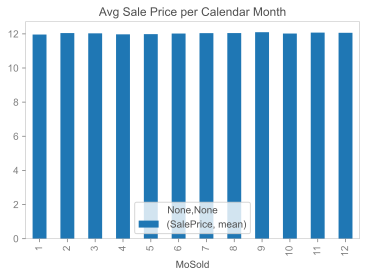

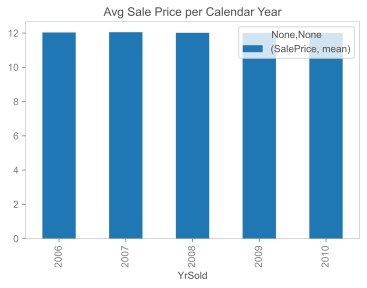

In [75]:
# Looking at sales by seasonality

df.groupby('MoSold').agg({'SalePrice': ['mean']}).plot.bar(title='Avg Sale Price per Calendar Month')
df.groupby('YrSold').agg({'SalePrice': ['mean']}).plot.bar(title='Avg Sale Price per Calendar Year')


In [39]:
for col in categorical:
    df_group = df.groupby(by=col).SalePrice.agg(['mean', 'count'])
    df_group['proportion'] = round(df_group['count']/row_ct, 2)
    df_group['diff'] = round(df_group['mean'] - tgt_mean, 0)
    df_group['rate'] = round((df_group['mean'] / tgt_mean), 3)
    df_group['mean'] = df_group['mean'].astype(int)
    df_group['mean'] = df_group['mean'].apply('{:,}'.format)
    print(f"Stats for {col} ({desc_dict[col]}):")
    display(df_group)

Stats for MSZoning (Identifies the general zoning classification of the sale.):


,mean,count,proportion,diff,rate
MSZoning,,,,,
C (all),"74,528",10,0.01,-106393.0,0.412
FV,"214,014",65,0.04,33093.0,1.183
RH,"131,558",16,0.01,-49363.0,0.727
RL,"191,004",1151,0.79,10084.0,1.056
RM,"126,316",218,0.15,-54604.0,0.698


Stats for Street (Type of road access to property):


,mean,count,proportion,diff,rate
Street,,,,,
Grvl,"130,190",6,0.0,-50731.0,0.720
Pave,"181,130",1454,1.0,209.0,1.001


Stats for Alley (Type of alley access to property):


,mean,count,proportion,diff,rate
Alley,,,,,
Grvl,"122,219",50,0.03,-58702.0,0.676
NA,"183,452",1369,0.94,2531.0,1.014
Pave,"168,000",41,0.03,-12921.0,0.929


Stats for LotShape (General shape of property):


,mean,count,proportion,diff,rate
LotShape,,,,,
IR1,"206,101",484,0.33,25180.0,1.139
IR2,"239,833",41,0.03,58912.0,1.326
IR3,"216,036",10,0.01,35115.0,1.194
Reg,"164,754",925,0.63,-16166.0,0.911


Stats for LandContour (Flatness of the property):


,mean,count,proportion,diff,rate
LandContour,,,,,
Bnk,"143,104",63,0.04,-37817.0,0.791
HLS,"231,533",50,0.03,50613.0,1.280
Low,"203,661",36,0.02,22740.0,1.126
Lvl,"180,183",1311,0.90,-737.0,0.996


Stats for Utilities (Type of utilities available):


,mean,count,proportion,diff,rate
Utilities,,,,,
AllPub,"180,950",1459,1.0,30.0,1.00
NoSeWa,"137,500",1,0.0,-43421.0,0.76


Stats for LotConfig (Lot configuration):


,mean,count,proportion,diff,rate
LotConfig,,,,,
Corner,"181,623",263,0.18,702.0,1.004
CulDSac,"223,854",94,0.06,42933.0,1.237
FR2,"177,934",47,0.03,-2987.0,0.983
FR3,"208,475",4,0.00,27554.0,1.152
Inside,"176,938",1052,0.72,-3983.0,0.978


Stats for LandSlope (Slope of property):


,mean,count,proportion,diff,rate
LandSlope,,,,,
Gtl,"179,956",1382,0.95,-964.0,0.995
Mod,"196,734",65,0.04,15813.0,1.087
Sev,"204,379",13,0.01,23458.0,1.130


Stats for Neighborhood (Physical locations within Ames city limits):


,mean,count,proportion,diff,rate
Neighborhood,,,,,
Blmngtn,"194,870",17,0.01,13950.0,1.077
Blueste,"137,500",2,0.00,-43421.0,0.760
BrDale,"104,493",16,0.01,-76427.0,0.578
BrkSide,"124,834",58,0.04,-56087.0,0.690
ClearCr,"212,565",28,0.02,31644.0,1.175
CollgCr,"197,965",150,0.10,17045.0,1.094
Crawfor,"210,624",51,0.03,29704.0,1.164
Edwards,"128,219",100,0.07,-52701.0,0.709
Gilbert,"192,854",79,0.05,11933.0,1.066


Stats for Condition1 (Proximity to various conditions):


,mean,count,proportion,diff,rate
Condition1,,,,,
Artery,"135,091",48,0.03,-45830.0,0.747
Feedr,"142,475",81,0.06,-38446.0,0.788
Norm,"184,495",1260,0.86,3574.0,1.020
PosA,"225,875",8,0.01,44954.0,1.248
PosN,"215,184",19,0.01,34263.0,1.189
RRAe,"138,400",11,0.01,-42521.0,0.765
RRAn,"184,396",26,0.02,3475.0,1.019
RRNe,"190,750",2,0.00,9829.0,1.054
RRNn,"212,400",5,0.00,31479.0,1.174


Stats for Condition2 (Proximity to various conditions (if more than one is present)):


,mean,count,proportion,diff,rate
Condition2,,,,,
Artery,"106,500",2,0.00,-74421.0,0.589
Feedr,"121,166",6,0.00,-59755.0,0.670
Norm,"181,169",1445,0.99,248.0,1.001
PosA,"325,000",1,0.00,144079.0,1.796
PosN,"284,875",2,0.00,103954.0,1.575
RRAe,"190,000",1,0.00,9079.0,1.050
RRAn,"136,905",1,0.00,-44016.0,0.757
RRNn,"96,750",2,0.00,-84171.0,0.535


Stats for BldgType (Type of dwelling):


,mean,count,proportion,diff,rate
BldgType,,,,,
1Fam,"185,763",1220,0.84,4843.0,1.027
2fmCon,"128,432",31,0.02,-52489.0,0.710
Duplex,"133,541",52,0.04,-47380.0,0.738
Twnhs,"135,911",43,0.03,-45010.0,0.751
TwnhsE,"181,959",114,0.08,1038.0,1.006


Stats for HouseStyle (Style of dwelling):


,mean,count,proportion,diff,rate
HouseStyle,,,,,
1.5Fin,"143,116",154,0.11,-37804.0,0.791
1.5Unf,"110,150",14,0.01,-70771.0,0.609
1Story,"175,985",726,0.50,-4936.0,0.973
2.5Fin,"220,000",8,0.01,39079.0,1.216
2.5Unf,"157,354",11,0.01,-23567.0,0.870
2Story,"210,051",445,0.30,29131.0,1.161
SFoyer,"135,074",37,0.03,-45847.0,0.747
SLvl,"166,703",65,0.04,-14218.0,0.921


Stats for RoofStyle (Type of roof):


,mean,count,proportion,diff,rate
RoofStyle,,,,,
Flat,"194,690",13,0.01,13769.0,1.076
Gable,"171,483",1141,0.78,-9437.0,0.948
Gambrel,"148,909",11,0.01,-32012.0,0.823
Hip,"218,876",286,0.20,37956.0,1.210
Mansard,"180,568",7,0.00,-353.0,0.998
Shed,"225,000",2,0.00,44079.0,1.244


Stats for RoofMatl (Roof material):


,mean,count,proportion,diff,rate
RoofMatl,,,,,
ClyTile,"160,000",1,0.00,-20921.0,0.884
CompShg,"179,803",1434,0.98,-1118.0,0.994
Membran,"241,500",1,0.00,60579.0,1.335
Metal,"180,000",1,0.00,-921.0,0.995
Roll,"137,000",1,0.00,-43921.0,0.757
Tar&Grv,"185,406",11,0.01,4485.0,1.025
WdShake,"241,400",5,0.00,60479.0,1.334
WdShngl,"390,250",6,0.00,209329.0,2.157


Stats for Exterior1st (Exterior covering on house):


,mean,count,proportion,diff,rate
Exterior1st,,,,,
AsbShng,"107,385",20,0.01,-73536.0,0.594
AsphShn,"100,000",1,0.00,-80921.0,0.553
BrkComm,"71,000",2,0.00,-109921.0,0.392
BrkFace,"194,573",50,0.03,13652.0,1.075
CBlock,"105,000",1,0.00,-75921.0,0.580
CemntBd,"231,690",61,0.04,50769.0,1.281
HdBoard,"163,077",222,0.15,-17844.0,0.901
ImStucc,"262,000",1,0.00,81079.0,1.448
MetalSd,"149,422",220,0.15,-31499.0,0.826


Stats for Exterior2nd (Exterior covering on house (if more than one material)):


,mean,count,proportion,diff,rate
Exterior2nd,,,,,
AsbShng,"114,060",20,0.01,-66861.0,0.630
AsphShn,"138,000",3,0.00,-42921.0,0.763
Brk Cmn,"126,714",7,0.00,-54207.0,0.700
BrkFace,"195,818",25,0.02,14897.0,1.082
CBlock,"105,000",1,0.00,-75921.0,0.580
CmentBd,"230,093",60,0.04,49173.0,1.272
HdBoard,"167,661",207,0.14,-13260.0,0.927
ImStucc,"252,070",10,0.01,71149.0,1.393
MetalSd,"149,803",214,0.15,-31118.0,0.828


Stats for MasVnrType (Masonry veneer type):


,mean,count,proportion,diff,rate
MasVnrType,,,,,
BrkCmn,"146,318",15,0.01,-34603.0,0.809
BrkFace,"204,691",445,0.30,23771.0,1.131
None,"156,221",864,0.59,-24699.0,0.863
Stone,"265,583",128,0.09,84662.0,1.468


Stats for ExterQual (Evaluates the quality of the material on the exterior ):


,mean,count,proportion,diff,rate
ExterQual,,,,,
Ex,"367,360",52,0.04,186440.0,2.031
Fa,"87,985",14,0.01,-92936.0,0.486
Gd,"231,633",488,0.33,50712.0,1.280
TA,"144,341",906,0.62,-36580.0,0.798


Stats for ExterCond (Evaluates the present condition of the material on the exterior):


,mean,count,proportion,diff,rate
ExterCond,,,,,
Ex,"201,333",3,0.00,20412.0,1.113
Fa,"102,595",28,0.02,-78326.0,0.567
Gd,"168,897",146,0.10,-12024.0,0.934
Po,"76,500",1,0.00,-104421.0,0.423
TA,"184,034",1282,0.88,3114.0,1.017


Stats for Foundation (Type of foundation):


,mean,count,proportion,diff,rate
Foundation,,,,,
BrkTil,"132,291",146,0.10,-48630.0,0.731
CBlock,"149,805",634,0.43,-31115.0,0.828
PConc,"225,230",647,0.44,44309.0,1.245
Slab,"107,365",24,0.02,-73556.0,0.593
Stone,"165,959",6,0.00,-14962.0,0.917
Wood,"185,666",3,0.00,4745.0,1.026


Stats for BsmtQual (Evaluates the height of the basement):


,mean,count,proportion,diff,rate
BsmtQual,,,,,
Ex,"327,041",121,0.08,146120.0,1.808
Fa,"115,692",35,0.02,-65229.0,0.639
Gd,"202,688",618,0.42,21767.0,1.120
TA,"140,759",649,0.44,-40161.0,0.778


Stats for BsmtCond (Evaluates the general condition of the basement):


,mean,count,proportion,diff,rate
BsmtCond,,,,,
Fa,"121,809",45,0.03,-59112.0,0.673
Gd,"213,599",65,0.04,32679.0,1.181
Po,"64,000",2,0.00,-116921.0,0.354
TA,"183,632",1311,0.90,2711.0,1.015


Stats for BsmtExposure (Refers to walkout or garden level walls):


,mean,count,proportion,diff,rate
BsmtExposure,,,,,
Av,"206,643",221,0.15,25722.0,1.142
Gd,"257,689",134,0.09,76769.0,1.424
Mn,"192,789",114,0.08,11868.0,1.066
No,"165,652",953,0.65,-15269.0,0.916


Stats for BsmtFinType1 (Rating of basement finished area):


,mean,count,proportion,diff,rate
BsmtFinType1,,,,,
ALQ,"161,573",220,0.15,-19348.0,0.893
BLQ,"149,493",148,0.10,-31428.0,0.826
GLQ,"235,413",418,0.29,54493.0,1.301
LwQ,"151,852",74,0.05,-29068.0,0.839
Rec,"146,889",133,0.09,-34032.0,0.812
Unf,"170,670",430,0.29,-10251.0,0.943


Stats for BsmtFinType2 (Rating of basement finished area (if multiple types)):


,mean,count,proportion,diff,rate
BsmtFinType2,,,,,
ALQ,"209,942",19,0.01,29021.0,1.160
BLQ,"151,101",33,0.02,-29820.0,0.835
GLQ,"180,982",14,0.01,61.0,1.000
LwQ,"164,364",46,0.03,-16557.0,0.908
Rec,"164,917",54,0.04,-16004.0,0.912
Unf,"184,694",1256,0.86,3773.0,1.021


Stats for Heating (Type of heating):


,mean,count,proportion,diff,rate
Heating,,,,,
Floor,"72,500",1,0.00,-108421.0,0.401
GasA,"182,021",1428,0.98,1100.0,1.006
GasW,"166,632",18,0.01,-14289.0,0.921
Grav,"75,271",7,0.00,-105650.0,0.416
OthW,"125,750",2,0.00,-55171.0,0.695
Wall,"92,100",4,0.00,-88821.0,0.509


Stats for HeatingQC (Heating quality and condition):


,mean,count,proportion,diff,rate
HeatingQC,,,,,
Ex,"214,914",741,0.51,33993.0,1.188
Fa,"123,919",49,0.03,-57002.0,0.685
Gd,"156,858",241,0.17,-24062.0,0.867
Po,"87,000",1,0.00,-93921.0,0.481
TA,"142,362",428,0.29,-38558.0,0.787


Stats for CentralAir (Central air conditioning):


,mean,count,proportion,diff,rate
CentralAir,,,,,
N,"105,264",95,0.07,-75657.0,0.582
Y,"186,186",1365,0.93,5266.0,1.029


Stats for Electrical (Electrical system):


,mean,count,proportion,diff,rate
Electrical,,,,,
FuseA,"122,196",94,0.06,-58724.0,0.675
FuseF,"107,675",27,0.02,-73246.0,0.595
FuseP,"97,333",3,0.00,-83588.0,0.538
Mix,"67,000",1,0.00,-113921.0,0.370
SBrkr,"186,825",1334,0.91,5904.0,1.033


Stats for KitchenQual (Kitchen quality):


,mean,count,proportion,diff,rate
KitchenQual,,,,,
Ex,"328,554",100,0.07,147633.0,1.816
Fa,"105,565",39,0.03,-75356.0,0.583
Gd,"212,116",586,0.40,31195.0,1.172
TA,"139,962",735,0.50,-40959.0,0.774


Stats for Functional (Home functionality (Assume typical unless deductions are warranted)):


,mean,count,proportion,diff,rate
Functional,,,,,
Maj1,"153,948",14,0.01,-26973.0,0.851
Maj2,"85,800",5,0.00,-95121.0,0.474
Min1,"146,385",31,0.02,-34536.0,0.809
Min2,"144,240",34,0.02,-36681.0,0.797
Mod,"168,393",15,0.01,-12528.0,0.931
Sev,"129,000",1,0.00,-51921.0,0.713
Typ,"183,429",1360,0.93,2508.0,1.014


Stats for FireplaceQu (Fireplace quality):


,mean,count,proportion,diff,rate
FireplaceQu,,,,,
Ex,"337,712",24,0.02,156791.0,1.867
Fa,"167,298",33,0.02,-13623.0,0.925
Gd,"226,351",380,0.26,45430.0,1.251
NA,"141,331",690,0.47,-39590.0,0.781
Po,"129,764",20,0.01,-51157.0,0.717
TA,"205,723",313,0.21,24802.0,1.137


Stats for GarageType (Garage location):


,mean,count,proportion,diff,rate
GarageType,,,,,
2Types,"151,283",6,0.00,-29638.0,0.836
Attchd,"202,892",870,0.60,21971.0,1.121
Basment,"160,570",19,0.01,-20351.0,0.888
BuiltIn,"254,751",88,0.06,73831.0,1.408
CarPort,"109,962",9,0.01,-70959.0,0.608
Detchd,"134,091",387,0.27,-46830.0,0.741


Stats for GarageFinish (Interior finish of the garage):


,mean,count,proportion,diff,rate
GarageFinish,,,,,
Fin,"240,052",352,0.24,59131.0,1.327
RFn,"202,068",422,0.29,21148.0,1.117
Unf,"142,156",605,0.41,-38765.0,0.786


Stats for GarageQual (Garage quality):


,mean,count,proportion,diff,rate
GarageQual,,,,,
Ex,"241,000",3,0.00,60079.0,1.332
Fa,"123,573",48,0.03,-57348.0,0.683
Gd,"215,860",14,0.01,34940.0,1.193
Po,"100,166",3,0.00,-80755.0,0.554
TA,"187,489",1311,0.90,6569.0,1.036


Stats for GarageCond (Garage condition):


,mean,count,proportion,diff,rate
GarageCond,,,,,
Ex,"124,000",2,0.00,-56921.0,0.685
Fa,"114,654",35,0.02,-66267.0,0.634
Gd,"179,930",9,0.01,-991.0,0.995
Po,"108,500",7,0.00,-72421.0,0.600
TA,"187,885",1326,0.91,6965.0,1.038


Stats for PavedDrive (Paved driveway):


,mean,count,proportion,diff,rate
PavedDrive,,,,,
N,"115,039",90,0.06,-65882.0,0.636
P,"132,330",30,0.02,-48591.0,0.731
Y,"186,433",1340,0.92,5513.0,1.030


Stats for PoolQC (Pool quality):


,mean,count,proportion,diff,rate
PoolQC,,,,,
Ex,"490,000",2,0.0,309079.0,2.708
Fa,"215,500",2,0.0,34579.0,1.191
Gd,"201,990",3,0.0,21069.0,1.116
NA,"180,404",1453,1.0,-517.0,0.997


Stats for Fence (Fence quality):


,mean,count,proportion,diff,rate
Fence,,,,,
GdPrv,"178,927",59,0.04,-1994.0,0.989
GdWo,"140,379",54,0.04,-40542.0,0.776
MnPrv,"148,751",157,0.11,-32170.0,0.822
MnWw,"134,286",11,0.01,-46635.0,0.742
NA,"187,596",1179,0.81,6676.0,1.037


Stats for MiscFeature (Miscellaneous feature not covered in other categories):


,mean,count,proportion,diff,rate
MiscFeature,,,,,
Gar2,"170,750",2,0.00,-10171.0,0.944
NA,"182,046",1406,0.96,1125.0,1.006
Othr,"94,000",2,0.00,-86921.0,0.520
Shed,"151,187",49,0.03,-29734.0,0.836
TenC,"250,000",1,0.00,69079.0,1.382


Stats for SaleType (Type of sale):


,mean,count,proportion,diff,rate
SaleType,,,,,
COD,"143,973",43,0.03,-36948.0,0.796
CWD,"210,600",4,0.00,29679.0,1.164
Con,"269,600",2,0.00,88679.0,1.490
ConLD,"138,780",9,0.01,-42140.0,0.767
ConLI,"200,390",5,0.00,19469.0,1.108
ConLw,"143,700",5,0.00,-37221.0,0.794
New,"274,945",122,0.08,94024.0,1.520
Oth,"119,850",3,0.00,-61071.0,0.662
WD,"173,401",1267,0.87,-7519.0,0.958


Stats for SaleCondition (Condition of sale):


,mean,count,proportion,diff,rate
SaleCondition,,,,,
Abnorml,"146,526",101,0.07,-34395.0,0.810
AdjLand,"104,125",4,0.00,-76796.0,0.576
Alloca,"167,377",12,0.01,-13544.0,0.925
Family,"149,600",20,0.01,-31321.0,0.827
Normal,"175,202",1198,0.82,-5719.0,0.968
Partial,"272,291",125,0.09,91371.0,1.505


Stats for MSSubClass (Identifies the type of dwelling involved in the sale.	):


,mean,count,proportion,diff,rate
MSSubClass,,,,,
120,"200,779",87,0.06,19858.0,1.110
160,"138,647",63,0.04,-42274.0,0.766
180,"102,300",10,0.01,-78621.0,0.565
190,"129,613",30,0.02,-51308.0,0.716
20,"185,224",536,0.37,4304.0,1.024
30,"95,829",69,0.05,-85091.0,0.530
40,"156,125",4,0.00,-24796.0,0.863
45,"108,591",12,0.01,-72330.0,0.600
50,"143,302",144,0.10,-37618.0,0.792


Stats for YrSold (Year Sold (YYYY)):


,mean,count,proportion,diff,rate
YrSold,,,,,
2006,"182,549",314,0.22,1628.0,1.009
2007,"186,063",329,0.23,5142.0,1.028
2008,"177,360",304,0.21,-3560.0,0.980
2009,"179,432",338,0.23,-1489.0,0.992
2010,"177,393",175,0.12,-3528.0,0.981


The above statistics reveal that numerous features are highly imbalanced - therefore, they can be removed from the model.

In [40]:
for c in [
'Street',
'Alley',
'LandContour',
'Utilities',
'LandSlope',
'Condition2',
'RoofMatl',
'Heating',
'Electrical',
'GarageQual',
'GarageCond',
'PavedDrive',
'PoolQC',
'MiscFeature',
'BsmtCond',
'Functional',
'CentralAir'
]:
    categorical.remove(c)

## Training the Model

### Test/Val/Train Split

In [41]:
# train/validation/test split
df['log_price'] = np.log1p(df.SalePrice)
target = ['log_price']

df_train_full, df_test = train_test_split(df[
    numeric+
    categorical+
    target], test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)

y_train = df_train.log_price.values
y_val = df_val.log_price.values
y_test = df_test.log_price.values
df_train_orig = df_train.copy()
for d in [df_train, df_val, df_test]:
    del d['log_price']
    # del d['SalePrice']

# Checking size
len(df_train), len(df_val), len(df_test)
len(df_train) + len(df_val) + len(df_test) == len(df)

# Checking target
y_train[:25]
y_val[:25]
y_test[:25]

(876, 292, 292)

True

array([12.46844076, 11.85652226, 12.15478461, 11.74006901, 12.20557752,
       12.31717117, 12.37159132, 12.06105265, 11.40757606, 11.7745279 ,
       12.18587504, 12.3365569 , 12.27839796, 12.33929587, 10.91510665,
       12.06528067, 11.97939159, 11.87688084, 11.76757544, 12.12811651,
       12.1034916 , 11.81303746, 11.85652226, 11.6526961 , 12.01364621])

array([12.18587504, 12.0435596 , 12.44509348, 11.58896942, 12.20607765,
       11.30221678, 12.00151161, 12.02719116, 12.38708918, 11.69108002,
       11.58525543, 12.15478461, 11.96718709, 12.25248379, 12.2404789 ,
       12.19096408, 12.85832231, 11.57590965, 12.1034916 , 11.77529742,
       11.56172515, 12.57418543, 12.18587504, 12.25486757, 11.92338475])

array([12.35233947, 12.09793606, 11.71178452, 11.34451865, 11.86358938,
       12.69350169, 12.56024797, 11.92504174, 12.18075997, 12.52453001,
       12.07254697, 11.01864554, 12.06681633, 12.86100121, 12.34583894,
       11.37367489, 11.73607702, 11.49883668, 12.46844076, 11.8706069 ,
       11.72804491, 11.71587447, 12.37370772, 12.72932375, 11.23850178])

In [42]:
# train/validation/test split

def split_data(df, target):
    df_train_full, df_test = train_test_split(df[
        numeric+
        categorical+
        [target]], test_size=0.2, random_state=1)
    df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)

    y_train = df_train[target].values
    y_val = df_val[target].values
    y_test = df_test[target].values
    # df_train_orig = df_train.copy()
    for d in [df_train, df_val, df_test]:
        del d[target]
    return df_train, df_val, df_test, y_train, y_val, y_test

In [43]:
df['SalePrice'] = np.log1p(df.SalePrice)

df_train, df_val, df_test, y_train, y_val, y_test = split_data(df, 'SalePrice')

In [44]:
# Checking split data
def check_splits(df_train, df_val, df_test, target):
    print(len(df_train), len(df_val), len(df_test))
    print(len(df_train) + len(df_val) + len(df_test) == len(df))
    print(y_train[:25])
    print(y_val[:25])
    print(y_test[:25])
    sns.histplot(target)
    for d in [df_train, df_val, df_test]:
        d.head()

876 292 292
True
[12.46844076 11.85652226 12.15478461 11.74006901 12.20557752 12.31717117
 12.37159132 12.06105265 11.40757606 11.7745279  12.18587504 12.3365569
 12.27839796 12.33929587 10.91510665 12.06528067 11.97939159 11.87688084
 11.76757544 12.12811651 12.1034916  11.81303746 11.85652226 11.6526961
 12.01364621]
[12.18587504 12.0435596  12.44509348 11.58896942 12.20607765 11.30221678
 12.00151161 12.02719116 12.38708918 11.69108002 11.58525543 12.15478461
 11.96718709 12.25248379 12.2404789  12.19096408 12.85832231 11.57590965
 12.1034916  11.77529742 11.56172515 12.57418543 12.18587504 12.25486757
 11.92338475]
[12.35233947 12.09793606 11.71178452 11.34451865 11.86358938 12.69350169
 12.56024797 11.92504174 12.18075997 12.52453001 12.07254697 11.01864554
 12.06681633 12.86100121 12.34583894 11.37367489 11.73607702 11.49883668
 12.46844076 11.8706069  11.72804491 11.71587447 12.37370772 12.72932375
 11.23850178]


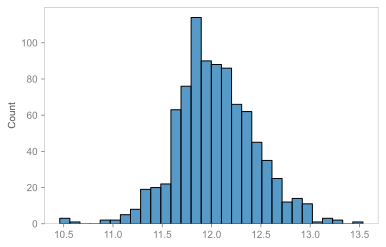

In [45]:
check_splits(df_train, df_val, df_test, y_train)

### Training

In [46]:
def feature_dict(data):
    data = data.fillna(0)
    feat_dict = data.to_dict(orient='records')
    return feat_dict

train_dict = feature_dict(df_train)
val_dict = feature_dict(df_val)
test_dict = feature_dict(df_test)

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
dv.transform(train_dict)
X_train = dv.transform(train_dict)
X_train.shape

# X_train[:5]
# y_train[:5]

X_val = dv.transform(val_dict)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_val)



DictVectorizer(sparse=False)

array([[1.734e+03, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.080e+03, 0.000e+00, 0.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [1.888e+03, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       ...,
       [2.036e+03, 0.000e+00, 0.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [1.512e+03, 1.142e+03, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.588e+03, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

(876, 238)

LinearRegression()

### Evaluation

In [47]:
# rmse = mean_squared_error(y_val, y_pred, squared=False)
# rmse

In [48]:
def rmse(y, y_pred):
    """Returns RMSE evaluation of (log) predictions, converting them back to normal"""
    rmse = np.sqrt(((np.expm1(y) - np.expm1(y_pred)) ** 2).mean())
    # print(f"Value for RMSE: {rmse}")
    return rmse

In [49]:
def mae(y, y_pred):
    """Returns MAE evaluation of predictions"""
    mae = abs(np.expm1(y) - np.expm1(y_pred)).mean()
    print(f"Value for MAE: {mae}")
    return mae

In [50]:
rmse(y_val, y_pred)
# rmse(y_val, y_pred)/tgt_mean
mae(y_val, y_pred)

28266.597421567338

Value for MAE: 18018.168101065978


18018.168101065978

In [51]:
# Cross-checking performance metrics above
all_res = pd.DataFrame(list(zip(np.expm1(y_val), np.expm1(y_pred), (np.expm1(y_val)-np.expm1(y_pred)))), columns=['y_val', 'y_pred', 'diff'])
# all_res = pd.DataFrame(list(zip((y_val), (y_pred), ((y_val)-(y_pred)))), columns=['y_val', 'y_pred', 'diff'])
all_res['perc_diff'] = (all_res['diff']/all_res['y_val'])*100
all_res['diff**2'] = all_res['diff']**2
all_res['abs_diff'] = abs(all_res['diff'])
all_res.head()
all_res['diff'].mean()
all_res['perc_diff'].mean()
np.sqrt(all_res['diff**2'].mean())
all_res['abs_diff'].mean()

,y_val,y_pred,diff,perc_diff,diff**2,abs_diff
0,196000.0,202964.550376,-6964.550376,-3.553342,4.850496e+07,6964.550376
1,170000.0,185447.682612,-15447.682612,-9.086872,2.386309e+08,15447.682612
2,254000.0,242216.387648,11783.612352,4.639217,1.388535e+08,11783.612352
3,107900.0,106163.073447,1736.926553,1.609756,3.016914e+06,1736.926553
4,200000.0,224388.496104,-24388.496104,-12.194248,5.947987e+08,24388.496104


2770.2320707915846

0.37668807933935494

28266.59742156735

18018.16810106598

### Standardising Model Training


In [52]:
def vectorizer(train_dict):
    """Takes training feature dictionaries and vectorizes them for model training."""
    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)
    return dv

dv = vectorizer(train_dict)

X_train = dv.transform(train_dict)
X_val = dv.transform(val_dict)
X_test = dv.transform(test_dict)

def train(X, y, model_type):
    """Takes vectorised feature list plus training target and returns trained model"""
    print('Training Model...')
    model = model_type
    model.fit(X, y_train)
    print('Model Complete!')
    return model

model = train(X_train, y_train, LinearRegression())


Training Model...
Model Complete!


In [53]:
y_pred = model.predict(X_val)
rmse(y_val, y_pred)
# rmse(y_val, y_pred)/tgt_mean
mae(y_val, y_pred)

28266.597421567338

Value for MAE: 18018.168101065978


18018.168101065978

In [54]:
model = train(X_train, y_train, Ridge(alpha=1.0))

y_pred = model.predict(X_val)
rmse(y_val, y_pred)
mae(y_val, y_pred)

Training Model...
Model Complete!


22277.991972851083

Value for MAE: 16110.649569272808


16110.649569272808

In [55]:
model = train(X_train, y_train, RidgeCV(    ))

y_pred = model.predict(X_val)
rmse(y_val, y_pred)
mae(y_val, y_pred)

Training Model...
Model Complete!


21499.349502143534

Value for MAE: 15163.946592084942


15163.946592084942

Ridge appears to be the most performant model, therefore.

## Parameter Tuning

In [56]:
solvers = ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga',]

for s in solvers:
    model = train(X_train, y_train, Ridge(alpha=1.0, solver=s))

    y_pred = model.predict(X_val)
    print(s)
    rmse(y_val, y_pred)
    mae(y_val, y_pred)

Training Model...
Model Complete!
auto


22277.991972851083

Value for MAE: 16110.649569272808


16110.649569272808

Training Model...
Model Complete!
svd


22277.99197284851

Value for MAE: 16110.649569268706


16110.649569268706

Training Model...
Model Complete!
cholesky


22277.991972851083

Value for MAE: 16110.649569272808


16110.649569272808

Training Model...
Model Complete!
lsqr


32884.318373481445

Value for MAE: 21648.46907536401


21648.46907536401

Training Model...
Model Complete!
sparse_cg


32529.492733669395

Value for MAE: 21486.883947425344


21486.883947425344

Training Model...
Model Complete!
sag


42973.360151039145

Value for MAE: 29605.703952849435


29605.703952849435

Training Model...
Model Complete!
saga


45855.72971113011

Value for MAE: 31238.276409234553


31238.276409234553

Auto setting apparently obtained Singular Value Decomposition for optimal model.

In [57]:
alphas=[1e-3, 1e-2, 1e-1, 1, 10, 100]

for a in alphas:
    model = train(X_train, y_train, Ridge(alpha=a, solver='svd'))
    y_pred = model.predict(X_val)
    print(a)
    rmse(y_val, y_pred)
    mae(y_val, y_pred)

Training Model...
Model Complete!
0.001


23627.948670701902

Value for MAE: 17129.38679076026


17129.38679076026

Training Model...
Model Complete!
0.01


23582.431456476275

Value for MAE: 17091.561496480936


17091.561496480936

Training Model...
Model Complete!
0.1


23300.333655142967

Value for MAE: 16887.872895628527


16887.872895628527

Training Model...
Model Complete!
1


22277.99197284851

Value for MAE: 16110.649569268706


16110.649569268706

Training Model...
Model Complete!
10


21499.329533707634

Value for MAE: 15163.92774412085


15163.92774412085

Training Model...
Model Complete!
100


23005.702631984874

Value for MAE: 15369.56697113338


15369.56697113338

In [70]:
# y_val[:5]

results = []

for a in range(5, 40):
    model = train(X_train, y_train, Ridge(alpha=a, solver='svd'))

    y_pred = model.predict(X_val)
    maeres = mae(y_val, y_pred)
    rmseres = (rmse(y_val, y_pred))
    results.append([a, rmseres, maeres])

Training Model...
Model Complete!
Value for MAE: 15381.963004431835
Training Model...
Model Complete!
Value for MAE: 15308.414332661778
Training Model...
Model Complete!
Value for MAE: 15253.151780905413
Training Model...
Model Complete!
Value for MAE: 15207.53000869623
Training Model...
Model Complete!
Value for MAE: 15182.832219644552
Training Model...
Model Complete!
Value for MAE: 15163.92774412085
Training Model...
Model Complete!
Value for MAE: 15148.952714208395
Training Model...
Model Complete!
Value for MAE: 15134.998342311019
Training Model...
Model Complete!
Value for MAE: 15121.71888746697
Training Model...
Model Complete!
Value for MAE: 15111.294026289448
Training Model...
Model Complete!
Value for MAE: 15104.301061306818
Training Model...
Model Complete!
Value for MAE: 15098.241071436249
Training Model...
Model Complete!
Value for MAE: 15092.368695914356
Training Model...
Model Complete!
Value for MAE: 15086.487317564712
Training Model...
Model Complete!
Value for MAE: 15

,alpha,rmse,mae
0,5,21592.309156,15381.963004
1,6,21550.548028,15308.414333
2,7,21524.136452,15253.151781
3,8,21508.562326,15207.530009
4,9,21500.943121,15182.832220
5,10,21499.329534,15163.927744
6,11,21502.345655,15148.952714
7,12,21508.987567,15134.998342
8,13,21518.503285,15121.718887
9,14,21530.317486,15111.294026


<AxesSubplot:xlabel='alpha'>

<AxesSubplot:xlabel='alpha'>

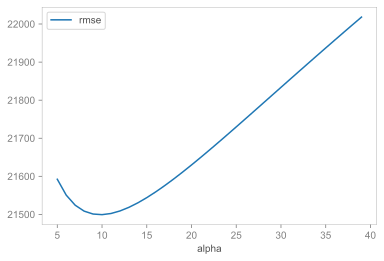

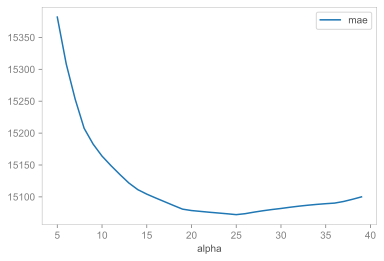

In [71]:
res_df = pd.DataFrame(results, columns = ['alpha', 'rmse', 'mae'])
res_df.head(20)

res_df.plot.line(x='alpha', y=['rmse'])
res_df.plot.line(x='alpha', y=['mae'])


Training Model...
Model Complete!
Value for MAE: 17096.229725881938
Training Model...
Model Complete!
Value for MAE: 17048.182676804492
Training Model...
Model Complete!
Value for MAE: 17010.24618382076
Training Model...
Model Complete!
Value for MAE: 16985.34621731636
Training Model...
Model Complete!
Value for MAE: 16966.605219560148
Training Model...
Model Complete!
Value for MAE: 16958.392492549596
Training Model...
Model Complete!
Value for MAE: 16951.575784102133
Training Model...
Model Complete!
Value for MAE: 16944.93888637355
Training Model...
Model Complete!
Value for MAE: 16937.79333278161
Training Model...
Model Complete!
Value for MAE: 16933.758534066124
Training Model...
Model Complete!
Value for MAE: 16929.06869887163
Training Model...
Model Complete!
Value for MAE: 16924.34395523637
Training Model...
Model Complete!
Value for MAE: 16919.819070715057
Training Model...
Model Complete!
Value for MAE: 16914.9145734595
Training Model...
Model Complete!
Value for MAE: 16909.6

,alpha,rmse,mae
0,5,29651.910061,17096.229726
1,6,29630.336276,17048.182677
2,7,29616.086672,17010.246184
3,8,29607.163421,16985.346217
4,9,29602.321928,16966.605220


<AxesSubplot:xlabel='alpha'>

<AxesSubplot:xlabel='alpha'>

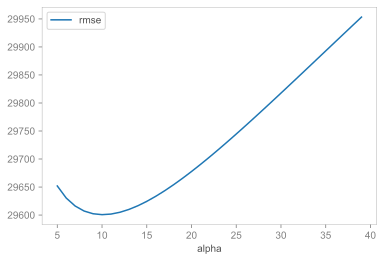

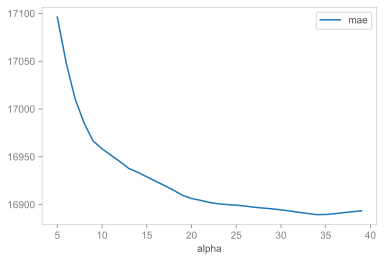

In [74]:
# Checking with test
results = []

for a in range(5, 40):
    model = train(X_train, y_train, Ridge(alpha=a, solver='svd'))

    y_pred = model.predict(X_test)
    maeres = mae(y_test, y_pred)
    rmseres = (rmse(y_test, y_pred))
    results.append([a, rmseres, maeres])


res_df = pd.DataFrame(results, columns = ['alpha', 'rmse', 'mae'])
res_df.head()

res_df.plot.line(x='alpha', y=['rmse'])
res_df.plot.line(x='alpha', y=['mae'])

I'll go for alpha=10 - whilst MAE continues to improve after this, it's scarcely noticeable.

Therefore final model is Ridge(alpha=10, solver='svd').

Sequence of functions:

* feature_engineering
* split_data
* feature_dict
* vectorizer
* train
* model.predict()

In [80]:
# test customer
test_cust = df_train.sample()
test_cust
test_cust.to_json(orient='records')

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish,Fence,SaleType,SaleCondition,MSSubClass,YrSold
1206,0.0,8900,4,4,1966,1966,0.0,1056,0,0,...,TA,TA,NA,Detchd,Unf,MnPrv,WD,Normal,20,2006


'[{"LotFrontage":0.0,"LotArea":8900,"OverallQual":4,"OverallCond":4,"YearBuilt":1966,"YearRemodAdd":1966,"MasVnrArea":0.0,"BsmtFinSF1":1056,"BsmtFinSF2":0,"BsmtUnfSF":0,"TotalBsmtSF":1056,"1stFlrSF":1056,"2ndFlrSF":0,"LowQualFinSF":0,"GrLivArea":1056,"BsmtFullBath":1,"BsmtHalfBath":0,"FullBath":1,"HalfBath":0,"BedroomAbvGr":2,"KitchenAbvGr":1,"TotRmsAbvGrd":5,"Fireplaces":0,"GarageYrBlt":1966.0,"GarageCars":1,"GarageArea":384,"WoodDeckSF":0,"OpenPorchSF":42,"EnclosedPorch":0,"3SsnPorch":0,"ScreenPorch":0,"PoolArea":0,"MiscVal":0,"MoSold":11,"MSZoning":"RH","LotShape":"Reg","LotConfig":"Inside","Neighborhood":"SawyerW","Condition1":"Norm","BldgType":"1Fam","HouseStyle":"1Story","RoofStyle":"Gable","Exterior1st":"HdBoard","Exterior2nd":"HdBoard","MasVnrType":"None","ExterQual":"TA","ExterCond":"TA","Foundation":"CBlock","BsmtQual":"TA","BsmtExposure":"No","BsmtFinType1":"Rec","BsmtFinType2":"Unf","HeatingQC":"TA","KitchenQual":"TA","FireplaceQu":"NA","GarageType":"Detchd","GarageFinish":